In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_csv('bengaluru_house_prices.csv')

In [ ]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


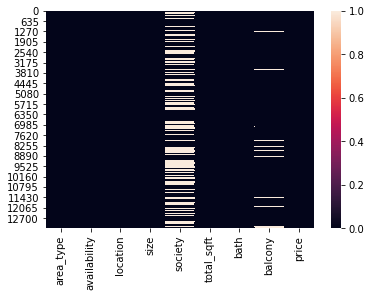

In [ ]:
df1.shape
import seaborn as sns
sns.heatmap(df1.isnull())

In [ ]:
df2 = df1.drop(['area_type','society','balcony'],axis=1)

In [ ]:
df2.head()

,availability,location,size,total_sqft,bath,price
0,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00


In [ ]:
df2.isnull().sum() #Returns no. of missing values in data set

availability     0
location         1
size            16
total_sqft       0
bath            73
price            0
dtype: int64

In [ ]:
df3 = df2.dropna() #Dropping rows/columns with null value

In [ ]:
df3.isnull().sum() #Verifying if null values removed

availability    0
location        0
size            0
total_sqft      0
bath            0
price           0
dtype: int64

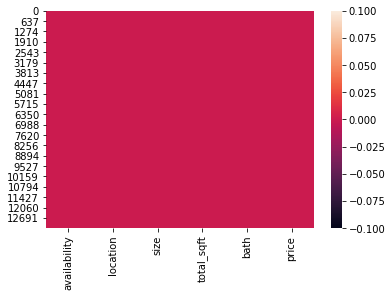

In [ ]:
sns.heatmap(df3.isnull())

In [ ]:
df3.head()

,availability,location,size,total_sqft,bath,price
0,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00


In [ ]:
df3['availability'].unique()  #Find unique elements

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '18-Apr',
       '20-Aug', '19-Mar', '17-Sep', '18-Dec', '17-Aug', '19-Apr',
       '18-Jun', '22-Dec', '22-Jan', '18-Aug', '19-Jan', '17-Jul',
       '18-Jul', '21-Jun', '20-May', '19-Aug', '18-Sep', '17-May',
       '17-Jun', '18-Oct', '21-May', '18-Jan', '20-Mar', '17-Dec',
       '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb', '19-May',
       '17-Nov', '20-Oct', '20-Jun', '19-Feb', '21-Oct', '21-Jan',
       '17-Mar', '17-Apr', '22-May', '19-Oct', '21-Jul', '21-Nov',
       '21-Mar', '16-Dec', '22-Mar', '20-Jan', '21-Sep', '21-Aug',
       '14-Nov', '19-Nov', '15-Nov', '16-Jul', '15-Jun', '17-Feb',
       '20-Nov', '20-Jul', '16-Sep', '15-Oct', '20-Feb', '15-Dec',
       '16-Oct', '22-Nov', '15-Aug', '17-Jan', '16-Nov', '20-Apr',
       '16-Jan', '14-Jul'], dtype=object)

In [ ]:
df3.groupby("availability")["availability"].count() #Split Data into groups based and count

availability
14-Jul               1
14-Nov               1
15-Aug               1
15-Dec               1
15-Jun               1
                 ...  
22-Jun              19
22-Mar               3
22-May               8
22-Nov               2
Ready To Move    10564
Name: availability, Length: 80, dtype: int64

In [ ]:
df3['availability']=df3['availability'].apply(lambda x: x if x in ('Ready To Move') else 'Future Possession')  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df3.groupby("availability")["availability"].count()

availability
Future Possession     2682
Ready To Move        10564
Name: availability, dtype: int64

In [ ]:
df3['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [ ]:
df3.groupby("location")["location"].count().sort_values(ascending = False) 

location
Whitefield                            534
Sarjapur  Road                        392
Electronic City                       302
Kanakpura Road                        266
Thanisandra                           233
                                     ... 
Konappana Agrahara                      1
Kodanda Reddy Layout                    1
Kirloskar layout, Basaveshwarnagar      1
Kengeri Satellite Town Stage II         1
 Anekal                                 1
Name: location, Length: 1304, dtype: int64

In [ ]:
locations = df3.groupby('location')['location'].count().sort_values()

In [ ]:
locations

location
 Anekal                                 1
Kengeri Satellite Town Stage II         1
Kirloskar layout, Basaveshwarnagar      1
Kodanda Reddy Layout                    1
Konappana Agrahara                      1
                                     ... 
Thanisandra                           233
Kanakpura Road                        266
Electronic City                       302
Sarjapur  Road                        392
Whitefield                            534
Name: location, Length: 1304, dtype: int64

In [ ]:
locations_20cnt = locations[locations <= 20]   #Finding less than 20 locations

In [ ]:
locations_20cnt

location
 Anekal                                1
Kengeri Satellite Town Stage II        1
Kirloskar layout, Basaveshwarnagar     1
Kodanda Reddy Layout                   1
Konappana Agrahara                     1
                                      ..
HBR Layout                            20
Sanjay nagar                          20
Yelachenahalli                        20
Binny Pete                            20
Poorna Pragna Layout                  20
Name: location, Length: 1161, dtype: int64

In [ ]:
df3['location'] = df3['location'].apply(lambda x: 'Others' if x in locations_20cnt else x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df3.groupby("location")["location"].count().sort_values(ascending = False)

location
Others                4314
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
                      ... 
Kathriguppe             22
Rayasandra              22
Ulsoor                  21
Basaveshwara Nagar      21
Hoskote                 21
Name: location, Length: 144, dtype: int64

In [ ]:
df3.head()

,availability,location,size,total_sqft,bath,price
0,Future Possession,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Ready To Move,Others,4 Bedroom,2600,5.0,120.00
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


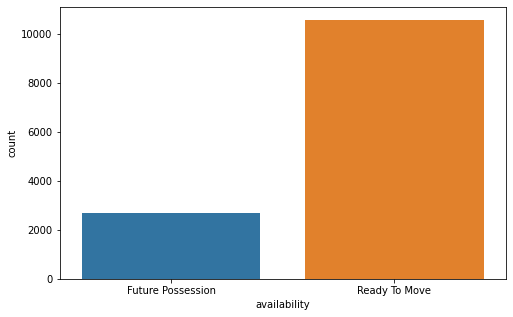

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.countplot(df3.availability)
plt.show()

In [ ]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
import re 
df3['bhks'] =df3['size'].apply(lambda x:  int(re.findall('\d+',x)[0].strip()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df3.head()

,availability,location,size,total_sqft,bath,price,bhks
0,Future Possession,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Ready To Move,Others,4 Bedroom,2600,5.0,120.00,4
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00,2


In [ ]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
 def get_mean(x):
    if re.findall('-',x):
        ss = x.strip().split('-')
        return ((float(ss[0])+float(ss[0]))/2)
    try:
        return float(x.strip())
    except:
        return None

In [ ]:
df3['total_sqft_new']=df3['total_sqft'].apply(get_mean)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df3.head()

,availability,location,size,total_sqft,bath,price,bhks,total_sqft_new
0,Future Possession,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0
1,Ready To Move,Others,4 Bedroom,2600,5.0,120.00,4,2600.0
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0
4,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0


In [ ]:
df3.isnull().sum()

availability       0
location           0
size               0
total_sqft         0
bath               0
price              0
bhks               0
total_sqft_new    46
dtype: int64

In [ ]:
df4 = df3.dropna()

In [ ]:
df4.isnull().sum()

availability      0
location          0
size              0
total_sqft        0
bath              0
price             0
bhks              0
total_sqft_new    0
dtype: int64

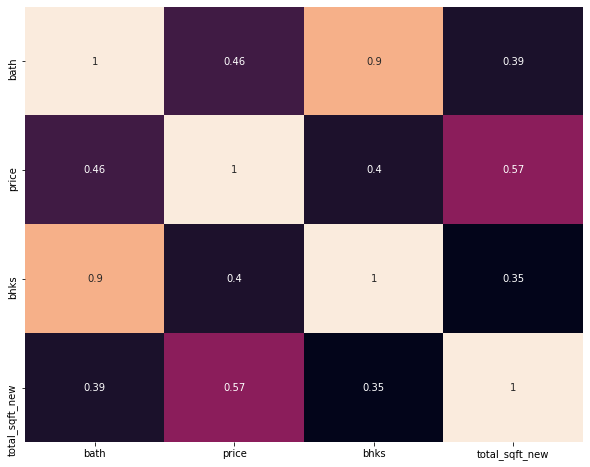

In [ ]:
import seaborn as sns 
plt.figure(figsize=(10,8))
sns.heatmap(df4.corr(),annot=True,cbar=False)
plt.show()

In [ ]:
df4['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [ ]:
df4.groupby('bath')['bath'].count().sort_values()

bath
40.0       1
18.0       1
15.0       1
14.0       1
27.0       1
16.0       2
13.0       3
11.0       3
12.0       7
10.0      13
9.0       41
8.0       64
7.0      102
6.0      269
5.0      521
1.0      781
4.0     1222
3.0     3274
2.0     6893
Name: bath, dtype: int64

In [ ]:
df5 = df4[df4['bath'] <= 10]

In [ ]:
df5.head()

,availability,location,size,total_sqft,bath,price,bhks,total_sqft_new
0,Future Possession,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0
1,Ready To Move,Others,4 Bedroom,2600,5.0,120.00,4,2600.0
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0
4,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0


In [ ]:
df6  = df5.drop(['size','total_sqft'],axis=1)

In [ ]:
df6.head()

,availability,location,bath,price,bhks,total_sqft_new
0,Future Possession,Electronic City Phase II,2.0,39.07,2,1056.0
1,Ready To Move,Others,5.0,120.00,4,2600.0
2,Ready To Move,Uttarahalli,2.0,62.00,3,1440.0
3,Ready To Move,Lingadheeranahalli,3.0,95.00,3,1521.0
4,Ready To Move,Kothanur,2.0,51.00,2,1200.0


In [ ]:
df6[df6['total_sqft_new']/df6['bhks'] < 400]

,availability,location,bath,price,bhks,total_sqft_new
9,Ready To Move,Others,6.0,370.0,6,1020.0
16,Ready To Move,Bisuvanahalli,3.0,48.0,3,1180.0
26,Ready To Move,Electronic City,1.0,23.1,2,660.0
29,Ready To Move,Electronic City,2.0,47.0,3,1025.0
31,Ready To Move,Bisuvanahalli,2.0,35.0,3,1075.0
...,...,...,...,...,...,...
13281,Ready To Move,Margondanahalli,5.0,125.0,5,1375.0
13300,Ready To Move,Hosakerehalli,6.0,145.0,5,1500.0
13303,Ready To Move,Vidyaranyapura,5.0,70.0,5,774.0
13306,Ready To Move,Others,5.0,325.0,4,1200.0


In [ ]:
df7 = df6[df6['total_sqft_new']/df6['bhks'] > 400]

In [ ]:
df7.head()

,availability,location,bath,price,bhks,total_sqft_new
0,Future Possession,Electronic City Phase II,2.0,39.07,2,1056.0
1,Ready To Move,Others,5.0,120.00,4,2600.0
2,Ready To Move,Uttarahalli,2.0,62.00,3,1440.0
3,Ready To Move,Lingadheeranahalli,3.0,95.00,3,1521.0
4,Ready To Move,Kothanur,2.0,51.00,2,1200.0


In [ ]:
df7['price_per_sqft']=df7['price']*100000/df7['total_sqft_new']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,availability,location,bath,price,bhks,total_sqft_new,price_per_sqft
0,Future Possession,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606
1,Ready To Move,Others,5.0,120.00,4,2600.0,4615.384615
2,Ready To Move,Uttarahalli,2.0,62.00,3,1440.0,4305.555556
3,Ready To Move,Lingadheeranahalli,3.0,95.00,3,1521.0,6245.890861
4,Ready To Move,Kothanur,2.0,51.00,2,1200.0,4250.000000
...,...,...,...,...,...,...,...
13315,Ready To Move,Whitefield,4.0,231.00,5,3453.0,6689.834926
13316,Ready To Move,Others,5.0,400.00,4,3600.0,11111.111111
13317,Ready To Move,Raja Rajeshwari Nagar,2.0,60.00,2,1141.0,5258.545136
13318,Future Possession,Padmanabhanagar,4.0,488.00,4,4689.0,10407.336319


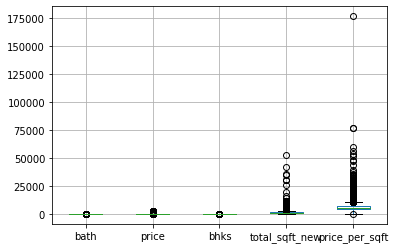

In [ ]:
df7.boxplot()
df7

In [ ]:
df7['price_per_sqft'].describe()

count     11446.000000
mean       6131.272179
std        3932.982959
min         267.829813
25%        4202.938655
50%        5263.157895
75%        6768.855941
max      176470.588235
Name: price_per_sqft, dtype: float64

In [ ]:
def rmv_price_outlier(df):       #Removing price outliers
    df_new=pd.DataFrame()
    for key,sdf in df.groupby('location'):
        m = sdf['price_per_sqft'].mean()
        s = sdf['price_per_sqft'].std()
        #print (sdf['location'])
        rdf = sdf[(sdf['price_per_sqft'] <= m+s) & (sdf['price_per_sqft'] > m-s)]
        #print(rdf)
        df_new = pd.concat([df_new,rdf],ignore_index=True)
    return df_new

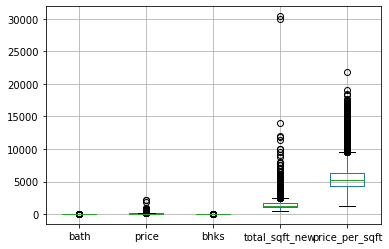

In [ ]:
df8 = rmv_price_outlier(df7)
df8.to_csv("modified_begaluru_2.csv",index=False)
df8.boxplot()

In [ ]:
df8.head()

,availability,location,bath,price,bhks,total_sqft_new,price_per_sqft
0,Ready To Move,1st Phase JP Nagar,4.0,250.0,4,2825.0,8849.557522
1,Ready To Move,1st Phase JP Nagar,3.0,167.0,3,1875.0,8906.666667
2,Ready To Move,1st Phase JP Nagar,4.0,210.0,3,2065.0,10169.491525
3,Ready To Move,1st Phase JP Nagar,3.0,157.0,3,2024.0,7756.916996
4,Ready To Move,1st Phase JP Nagar,3.0,225.0,3,2059.0,10927.634774


In [ ]:
df8.shape

(9512, 7)

In [ ]:
availability_dummy = pd.get_dummies(df8['availability'],drop_first=True)

In [ ]:
availability_dummy

,Ready To Move
0,1
1,1
2,1
3,1
4,1
...,...
9507,1
9508,1
9509,1
9510,1


In [ ]:
location_dummy = pd.get_dummies(df8['location'],drop_first=True) 

In [ ]:
df9=pd.concat([df8, availability_dummy,location_dummy],axis=1)

In [ ]:
df9.head()

,availability,location,bath,price,bhks,total_sqft_new,price_per_sqft,Ready To Move,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Ardendale,Attibele,BTM 2nd Stage,Babusapalaya,Balagere,Banashankari,Banashankari Stage III,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur Road,Bellandur,Bhoganhalli,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,...,Margondanahalli,Munnekollal,Mysore Road,Nagarbhavi,Old Airport Road,Old Madras Road,Others,Padmanabhanagar,Panathur,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sarjapur,Sarjapur Road,Seegehalli,Singasandra,Somasundara Palya,Sonnenahalli,Subramanyapura,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,Ready To Move,1st Phase JP Nagar,4.0,250.0,4,2825.0,8849.557522,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Ready To Move,1st Phase JP Nagar,3.0,167.0,3,1875.0,8906.666667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Ready To Move,1st Phase JP Nagar,4.0,210.0,3,2065.0,10169.491525,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Ready To Move,1st Phase JP Nagar,3.0,157.0,3,2024.0,7756.916996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Ready To Move,1st Phase JP Nagar,3.0,225.0,3,2059.0,10927.634774,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df10=df9.drop(['availability','location','price_per_sqft'],axis=1)

In [ ]:
df10

,bath,price,bhks,total_sqft_new,Ready To Move,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Ardendale,Attibele,BTM 2nd Stage,Babusapalaya,Balagere,Banashankari,Banashankari Stage III,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur Road,Bellandur,Bhoganhalli,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Brookefield,Budigere,CV Raman Nagar,...,Margondanahalli,Munnekollal,Mysore Road,Nagarbhavi,Old Airport Road,Old Madras Road,Others,Padmanabhanagar,Panathur,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sarjapur,Sarjapur Road,Seegehalli,Singasandra,Somasundara Palya,Sonnenahalli,Subramanyapura,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,4.0,250.00,4,2825.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,167.00,3,1875.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.0,210.00,3,2065.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3.0,157.00,3,2024.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3.0,225.00,3,2059.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9507,2.0,64.08,2,1160.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9508,3.0,92.13,3,1676.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9509,3.0,138.00,3,2503.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9510,3.0,135.00,3,1855.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
X = df10.drop(['price'], axis=1)
y = df10['price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0) #Split arrays into random train and test subsets

In [ ]:
len(X_train) #Returns the number of items in container

7609

In [ ]:
len(X_test)

1903

In [ ]:
X_train.describe() #Generating descriptive statistics

,bath,bhks,total_sqft_new,Ready To Move,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Ardendale,Attibele,BTM 2nd Stage,Babusapalaya,Balagere,Banashankari,Banashankari Stage III,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur Road,Bellandur,Bhoganhalli,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Brookefield,Budigere,CV Raman Nagar,Chandapura,...,Margondanahalli,Munnekollal,Mysore Road,Nagarbhavi,Old Airport Road,Old Madras Road,Others,Padmanabhanagar,Panathur,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sarjapur,Sarjapur Road,Seegehalli,Singasandra,Somasundara Palya,Sonnenahalli,Subramanyapura,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
count,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,...,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.00000,7609.000000,7609.000000,7609.000000,7609.00000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000,7609.000000
mean,2.451045,2.522671,1518.513054,0.782494,0.000131,0.002234,0.001577,0.010120,0.003548,0.002760,0.001051,0.004468,0.001971,0.002760,0.001971,0.002366,0.002366,0.001709,0.001971,0.002891,0.001840,0.002366,0.003680,0.005783,0.001840,0.015771,0.002103,0.001183,0.001840,0.006177,0.007228,0.003943,0.001051,0.002234,0.002497,0.002103,0.003943,0.004468,0.002234,0.005520,...,0.001577,0.001446,0.002628,0.003023,0.002366,0.004468,0.330267,0.001840,0.003417,0.001971,0.00460,0.012879,0.006440,0.004863,0.00460,0.001709,0.003286,0.006571,0.028913,0.001840,0.002366,0.001971,0.001314,0.003286,0.002628,0.002628,0.016691,0.005126,0.001971,0.002497,0.000920,0.014194,0.005126,0.001971,0.002497,0.003154,0.047838,0.017479,0.003548,0.006703
std,0.918470,0.824533,898.791038,0.412576,0.011464,0.047218,0.039684,0.100092,0.059467,0.052466,0.032410,0.066701,0.044359,0.052466,0.044359,0.048583,0.048583,0.041301,0.044359,0.053697,0.042858,0.048583,0.060554,0.075828,0.042858,0.124596,0.045811,0.034374,0.042858,0.078355,0.084717,0.062671,0.032410,0.047218,0.049911,0.045811,0.062671,0.066701,0.047218,0.074095,...,0.039684,0.037997,0.051205,0.054900,0.048583,0.066701,0.470340,0.042858,0.058359,0.044359,0.06767,0.112762,0.079994,0.069568,0.06767,0.041301,0.057230,0.080801,0.167573,0.042858,0.048583,0.044359,0.036231,0.057230,0.051205,0.051205,0.128118,0.071414,0.044359,0.049911,0.030319,0.118297,0.071414,0.044359,0.049911,0.056077,0.213438,0.131057,0.059467,0.081600
min,1.000000,1.000000,410.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model_score =cross_val_score(estimator=LinearRegression(),X=X_train, y=y_train, cv=6) #Evaluate a score by cross-validation using Linear Regression
model_score

array([0.88749248, 0.83974159, 0.77816298, 0.78621149, 0.80342302,
       0.75351985])

In [ ]:
model_score.mean()

0.8080919019704483

In [ ]:
model_score.std()

0.044122094231543285

In [ ]:
model_score =cross_val_score(estimator=DecisionTreeRegressor(),X=X_train, y=y_train, cv=5) #Cross-Validation using decision tree regressor
model_score

array([0.85269037, 0.68105162, 0.61876783, 0.72761682, 0.43330239])

In [ ]:
model_score.mean()

0.6626858073119257

In [ ]:
model_score.std()

0.13798595250302148

In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model_score =cross_val_score(estimator=RandomForestRegressor(),X=X_train, y=y_train, cv=5)
model_score

array([0.86341029, 0.81839929, 0.72978606, 0.80731405, 0.63422294])

In [ ]:
model_score.mean()

0.770626526962546

In [ ]:
model_score.std()

0.08063612092764705